### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data-sets/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].value_counts()

blackgram      100
pomegranate    100
papaya         100
muskmelon      100
rice           100
cotton         100
orange         100
watermelon     100
coffee         100
chickpea       100
kidneybeans    100
mothbeans      100
pigeonpeas     100
coconut        100
jute           100
mango          100
mungbean       100
grapes         100
lentil         100
maize          100
apple          100
banana         100
Name: label, dtype: int64

### Splitting the data-set into dependent and independent variables/features:
### After that, we divide the datasets into train and test

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [9]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [10]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Now, we will apply different ML algorithms to find out the best accuracy-yielding algorithm for our application:

In [13]:
# Creating empty lists of accuracy and models to compare.
accuracy = []
modelName = []

### Logistic Regression:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

# Making predictions and printing metrics:
logisticReg.fit(X_train, y_train)
predLogistic = logisticReg.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accLR = accuracy_score(y_test, predLogistic)
accuracy.append(accLR)
modelName.append("Logistic Regression")
print(classification_report(y_test, predLogistic))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       0.91      0.86      0.89        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       0.97      1.00      0.98        31
      cotton       0.85      0.97      0.90        29
      grapes       1.00      1.00      1.00        41
        jute       0.85      0.85      0.85        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.79      0.87        34
       mango       1.00      1.00      1.00        33
   mothbeans       0.81      0.88      0.85        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dTree.fit(X_train, y_train)
predDT = dTree.predict(X_test)
accDT = accuracy_score(y_test, predDT)
accuracy.append(accDT)
modelName.append("Decision Trees")
# Printing the metrics
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       0.69      0.94      0.80        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.87      0.93        31
      cotton       0.97      1.00      0.98        29
      grapes       1.00      1.00      1.00        41
        jute       1.00      0.33      0.50        27
 kidneybeans       1.00      0.73      0.85        30
      lentil       0.88      1.00      0.94        29
       maize       0.89      0.97      0.93        34
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.56      0.72        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       0.96      1.00      0.98        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

### Support Vector Machine(SVM):

In [18]:
from sklearn.svm import SVC

In [19]:
SVMModel = SVC()
SVMModel.fit(X_train, y_train)
predSVM = SVMModel.predict(X_test)
accSVM = accuracy_score(y_test, predSVM)
accuracy.append(accSVM)
modelName.append("SVM")
# Printing the metrics
print(classification_report(y_test, predSVM))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        31
      cotton       0.91      1.00      0.95        29
      grapes       1.00      1.00      1.00        41
        jute       0.79      1.00      0.89        27
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.97      0.97      0.97        29
       maize       1.00      0.91      0.95        34
       mango       1.00      1.00      1.00        33
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20)
RFModel.fit(X_train, y_train)
predRF = RFModel.predict(X_test)
accRF = accuracy_score(y_test, predRF)
accuracy.append(accRF)
modelName.append("Random Forest")
# Printing the metrics
print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        29
      grapes       1.00      1.00      1.00        41
        jute       0.96      0.96      0.96        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        34
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

### Now I will visualize the accuracies of different models and choose the one that's the best:

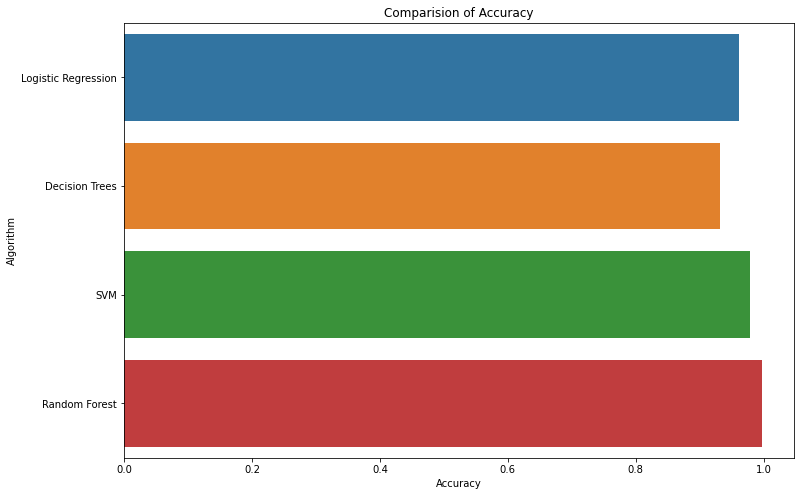

In [21]:
plt.figure(figsize = (12, 8))
plt.title("Comparision of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
sns.barplot(accuracy, modelName)

### Since the accuracy of Random Forest is the maximum(100%, I KNOW!!), we choose RFModel as our web application's model.

In [32]:
# Making a prediction:
testData = X.iloc[3]
testPrediction = RFModel.predict([testData])
print(testPrediction)

['rice']


### Saving the model using Pickle library:

In [33]:
import pickle

In [34]:
pickle_out = open("RFmodel.pkl", "wb")
pickle.dump(RFModel, pickle_out)
pickle_out.close()